In [1]:
from utilities.proj1_helpers import *

In [138]:
train_data = load_csv_data("data/train.csv")
y, x, ids = train_data[0], train_data[1], train_data[2]
print(y.shape, x.shape, ids.shape)

(250000,) (250000, 30) (250000,)


In [3]:
from regression.linear_models import *
from utilities.cross_validation import cross_validation, build_k_indices, split_data
from regression.loss import compute_rmse_loss, compute_logistic_loss

In [4]:
# Params to bruteforce
lambdas = np.logspace(-5, 1, 15)
degrees = np.arange(1, 8, 1)
k_folds = 4
seed = 1

In [4]:
from utilities.preprocessing import standard_scaler_outlier

In [5]:
x_scaled, means, sds = standard_scaler_outlier(x, -999)
x_scaled = np.c_[np.ones(x_scaled.shape[0]), x_scaled]

In [7]:
'''best_loss = 1e100
best_params = (-1, -1)
k_indices = build_k_indices(y, k_folds, seed)
degree = 1

for l in lambdas:
    loss_tr, loss_te = cross_validation(y, x_scaled, k_indices, k_folds, compute_mse_loss, 
                                        ridge_regression, lambda_=l)
    if loss_te < best_loss:
        best_loss = loss_te
        best_params = (l, degree)

    print("l={}, d={}: train {}, test {}".format(l, degree, loss_tr, loss_te))'''

'best_loss = 1e100\nbest_params = (-1, -1)\nk_indices = build_k_indices(y, k_folds, seed)\ndegree = 1\n\nfor l in lambdas:\n    loss_tr, loss_te = cross_validation(y, x_scaled, k_indices, k_folds, compute_mse_loss, \n                                        ridge_regression, lambda_=l)\n    if loss_te < best_loss:\n        best_loss = loss_te\n        best_params = (l, degree)\n\n    print("l={}, d={}: train {}, test {}".format(l, degree, loss_tr, loss_te))'

In [6]:
from utilities.pca import compute_pca
from utilities.stochastic import sigmoid, stochastic_gradient_descent
from regression.stochastic_models import *

In [8]:
x_pca, eig_pca = compute_pca(x_scaled, number_pc=x_scaled.shape[1])
x_tr_s, y_tr_s, x_te_s, y_te_s =split_data(x_scaled, y, 0.8)
x_tr_p, y_tr_p, x_te_p, y_te_p =split_data(x_pca, y, 0.8)

In [46]:
best_loss = 1e100
best_params = (-1, -1)
k_indices = build_k_indices(y, k_folds, seed)
degree = 1

for l in lambdas:
    ws = ridge_regression(y_tr_s, x_tr_s, l)
    loss_tr = compute_mse_loss(y_tr_s, x_tr_s, ws, l)
    loss_te = compute_mse_loss(y_te_s, x_te_s, ws, l)
    y_te_pred = predict_labels(ws, x_te_s)
    y_tr_pred = predict_labels(ws, x_tr_s)
    acc_tr = np.sum(y_tr_pred == y_tr_s) / len(y_tr_pred)
    acc_te = np.sum(y_te_pred == y_te_s) / len(y_te_pred)
    if loss_te < best_loss:
        best_loss = loss_te
        best_params = (l, degree)

    print("l={}: train {:.5f}, test {:.5f}; Acc: train {:.5f}, test {:.5f}".format(l, loss_tr, loss_te, acc_tr, acc_te))

l=1e-05: train 0.34010, test 0.34170; Acc: train 0.74425, test 0.74430
l=2.6826957952797274e-05: train 0.34011, test 0.34171; Acc: train 0.74424, test 0.74430
l=7.196856730011514e-05: train 0.34014, test 0.34174; Acc: train 0.74425, test 0.74432
l=0.00019306977288832496: train 0.34020, test 0.34180; Acc: train 0.74425, test 0.74438
l=0.0005179474679231213: train 0.34036, test 0.34197; Acc: train 0.74418, test 0.74450
l=0.0013894954943731374: train 0.34079, test 0.34241; Acc: train 0.74409, test 0.74430
l=0.003727593720314938: train 0.34191, test 0.34355; Acc: train 0.74395, test 0.74382
l=0.01: train 0.34467, test 0.34636; Acc: train 0.74285, test 0.74262
l=0.026826957952797246: train 0.35086, test 0.35263; Acc: train 0.74127, test 0.74104
l=0.07196856730011514: train 0.36289, test 0.36471; Acc: train 0.73733, test 0.73724
l=0.19306977288832497: train 0.38326, test 0.38495; Acc: train 0.73130, test 0.73066
l=0.5179474679231213: train 0.41260, test 0.41390; Acc: train 0.72440, test 0.72

In [88]:
initial_w = np.ones(x_scaled.shape[1])

In [71]:
w_a = stochastic_gradient_descent(y, x_scaled, initial_w, 1000, 0.1, compute_mse_loss, compute_mse_gradient, batch_size=1000, lambda_ = 0.0005)

Stochastic Gradient Descent(0/999): loss=46.16558120588174, w0=0.8476362068831526, w1=0.6191822257473014
Stochastic Gradient Descent(100/999): loss=0.33846621671484356, w0=-0.3134601337086184, w1=-0.022336333334290612
Stochastic Gradient Descent(200/999): loss=0.3501810938662076, w0=-0.3115723750710521, w1=0.010295251313304376
Stochastic Gradient Descent(300/999): loss=0.3219858991387721, w0=-0.306464833267286, w1=-0.002166545489386942
Stochastic Gradient Descent(400/999): loss=0.3404494970442871, w0=-0.3154584069678246, w1=0.010054151833928646
Stochastic Gradient Descent(500/999): loss=0.3243532959397195, w0=-0.3097905488555596, w1=0.01093813561374899
Stochastic Gradient Descent(600/999): loss=0.3394480444142086, w0=-0.31663533345605926, w1=0.00372145994862325
Stochastic Gradient Descent(700/999): loss=0.32675667473788517, w0=-0.31266657001831577, w1=0.017385682115349466
Stochastic Gradient Descent(800/999): loss=0.3244689219641002, w0=-0.3240575254390866, w1=0.008309181994105623
Stoc

In [18]:
y_pred_1 = x_scaled.dot(w_stoch[0])
np.sum((y > 0) == (y_pred_1 > 0))/len(y_pred_1)

0.66279200000000005

In [17]:
test_data = load_csv_data("data/test.csv")
y_sol, x_sol, ids_sol = test_data[0], test_data[1], test_data[2]
print(y_sol.shape, x_sol.shape, ids_sol.shape)

for i in range(1,x_sol.shape[1]):
    ind_ok = x_sol[:,i] != -999
    ind_nok = x_sol[:,i] == -999
    x_sol[ind_nok,i] = means[i]
    x_sol[:,i] -= means[i]
    x_sol[:,i] /= sds[i]

x_sol_scaled = np.c_[np.ones(x_sol.shape[0]), x_sol]
y_pred = 2 * (x_sol_scaled.dot(w_stoch[0]) > 0) - 1
create_csv_submission(ids_sol, y_pred, "third.csv")

(568238,) (568238, 30) (568238,)


In [13]:
w_stoch = stochastic_gradient_descent(y > 0, x_scaled, initial_w, 2000, 0.0001, compute_logistic_loss, compute_logistic_gradient, batch_size=1000)

Stochastic Gradient Descent(0/1999): loss=2750.1634627309354, w0=0.9894398952141038, w1=0.9897707042130031
Stochastic Gradient Descent(100/1999): loss=716.1887061268731, w0=-0.3167806095725085, w1=-0.0479637696333507
Stochastic Gradient Descent(200/1999): loss=538.7391591099657, w0=-0.7571478422656417, w1=-0.16395221764576048
Stochastic Gradient Descent(300/1999): loss=549.407513735666, w0=-0.8465621435996477, w1=-0.1489697354563976
Stochastic Gradient Descent(400/1999): loss=516.3986499475036, w0=-0.853121554443175, w1=-0.15029905073701114
Stochastic Gradient Descent(500/1999): loss=480.02667614056, w0=-0.8680943829227474, w1=-0.1394251553049066
Stochastic Gradient Descent(600/1999): loss=499.83390429331394, w0=-0.8632462336082599, w1=-0.11904802060829349
Stochastic Gradient Descent(700/1999): loss=525.0013757096322, w0=-0.8800792526958232, w1=-0.10630710340252908
Stochastic Gradient Descent(800/1999): loss=492.7323321593886, w0=-0.8614693716703666, w1=-0.08512750639134645
Stochastic 

In [74]:
y_pred_1 = sigmoid(x_tr_s.dot(w_stoch[0])) > 0.5
y_pred_2 = sigmoid(x_te_s.dot(w_stoch[0])) > 0.5
np.sum((y_tr_s > 0) == y_pred_1)/len(y_pred_1), np.sum((y_te_s > 0) == y_pred_2)/len(y_pred_2)

(0.750135, 0.75049999999999994)

In [7]:
import matplotlib.pyplot as plt

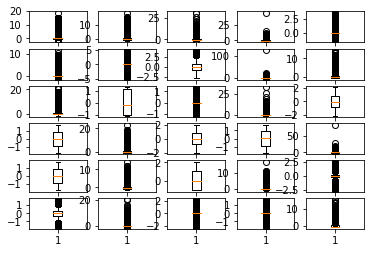

In [11]:
plt.figure(1)

for i in range(1, x_scaled.shape[1]):
    plt.subplot(6, 5, i)
    plt.boxplot(x_scaled[1:,i])
plt.show()

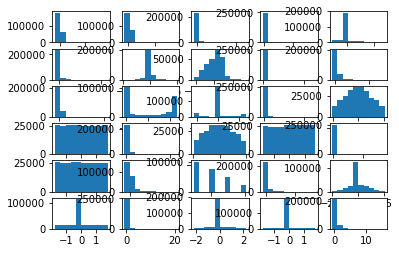

In [12]:
plt.figure(1)

for i in range(1, x_scaled.shape[1]):
    plt.subplot(6, 5, i)
    plt.hist(x_scaled[:,i])
plt.show()

In [8]:
import seaborn as sns

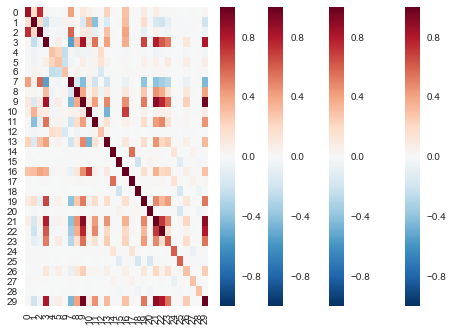

In [23]:
sns.heatmap(np.cov(x_scaled[:,1:].T))
plt.show()

In [77]:
test_data = load_csv_data("data/test.csv")
y_sol, x_sol, ids_sol = test_data[0], test_data[1], test_data[2]
print(y_sol.shape, x_sol.shape, ids_sol.shape)
x_sol_scaled = np.c_[np.ones(x_sol.shape[0]), standard_scaler_outlier(x_sol, -999)]
y_pred = 2 * (x_sol_scaled.dot(w_stoch[0]) > 0) - 1
create_csv_submission(ids_sol, y_pred, "third.csv")

(568238,) (568238, 30) (568238,)


In [78]:
np.sum(y_pred ==  2 * (sigmoid(x_sol_scaled.dot(w_stoch[0])) > 0.5) - 1)

568238

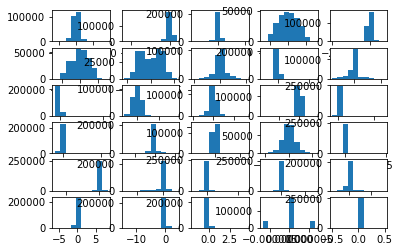

In [14]:
plt.figure(1)

for i in range(1, x_pca.shape[1]):
    plt.subplot(6, 5, i)
    plt.hist(x_pca[1:,i])
plt.show()

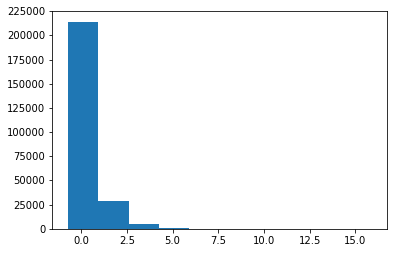

In [13]:
plt.hist(x_scaled[1:,i])
plt.show()

## Visualizing 2D-interactions between different data features

In [33]:
bad_indices = x[:,0] == -999
x_bad = x[bad_indices,:]
y_bad = y[bad_indices]
x_good = x[np.invert(bad_indices),:]
y_good = y[np.invert(bad_indices)]

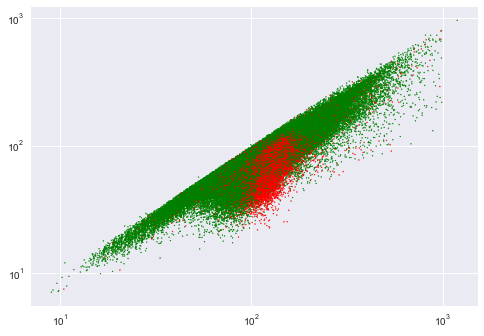

In [55]:
arr = np.array(['g','r'])
ind = ((y_good+1)/2).astype(int)
col = arr[ind]
ax = plt.gca()
ax.scatter(x_good[:,0], x_good[:,2], color=col, s=1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

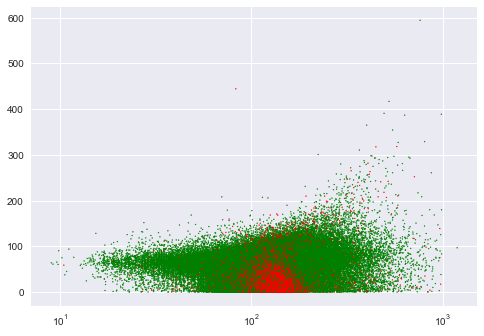

In [57]:
arr = np.array(['g','r'])
ind = ((y_good+1)/2).astype(int)
col = arr[ind]
ax = plt.gca()
ax.scatter(x_good[:,0], x_good[:,1], color=col, s=1)
ax.set_xscale('log')
plt.show()

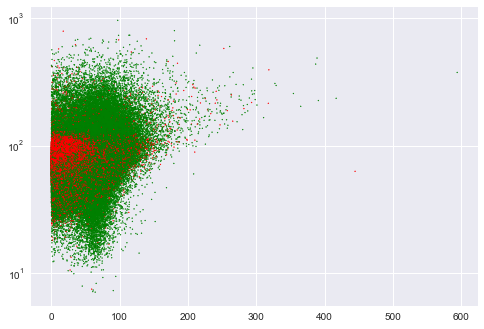

In [60]:
arr = np.array(['g','r'])
ind = ((y_good+1)/2).astype(int)
col = arr[ind]
ax = plt.gca()
ax.scatter(x_good[:,1], x_good[:,2], color=col, s=1)
ax.set_yscale('log')
plt.show()

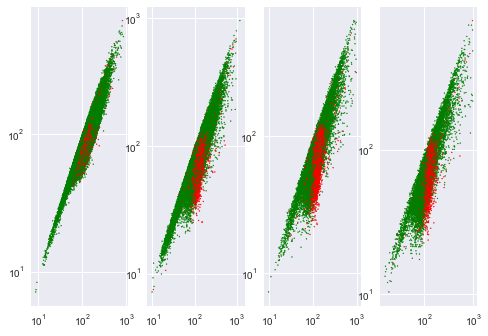

In [76]:
arr = np.array(['g','r'])
plt.figure(1)
ind = ((y_good+1)/2).astype(int)
col = arr[ind]
ax = plt.gca()
num_part = x_good[:,22]
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xscale('log')
    plt.yscale('log')
    indices = num_part==i
    plt.scatter(x_good[indices,0], x_good[indices,2], color=col[indices], s=1)
#ax.set_yscale('log')
plt.show()

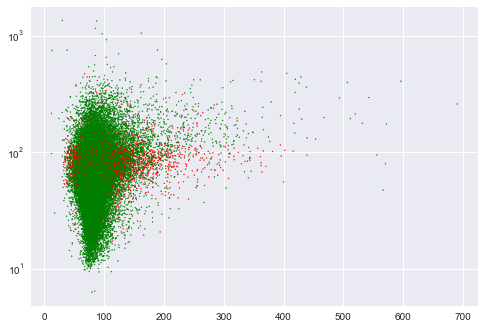

In [63]:
arr = np.array(['g','r'])
ind = ((y_bad+1)/2).astype(int)
col = arr[ind]
ax = plt.gca()
ax.scatter(x_bad[:,1], x_bad[:,2], color=col, s=1)
ax.set_yscale('log')
plt.show()

## Feature magic

In [139]:
x_tmp = x.copy()
x_tmp[np.invert(bad_indices)] = x_tmp[np.invert(bad_indices)] / 125

x_scaled, means, sds = standard_scaler_outlier(x_tmp[:,:], -999)
x_scaled = np.c_[np.ones(x_scaled.shape[0]), x_scaled]
x_tr_s, y_tr_s, x_te_s, y_te_s =split_data(x_scaled, y, 0.8)
initial_w = np.ones(x_tr_s.shape[1])

In [137]:
w_a = stochastic_gradient_descent(y_tr_s, x_tr_s, initial_w, 1000, 0.01, compute_mse_loss, compute_mse_gradient, batch_size=-1, lambda_ = 0.0005)

Stochastic Gradient Descent(0/999): loss=161.10588313903492, w0=0.9868341172800461, w1=0.9905645684435689
Stochastic Gradient Descent(100/999): loss=0.7885398493239345, w0=0.1613752926052864, w1=0.4231049123138337
Stochastic Gradient Descent(200/999): loss=0.5110181449736878, w0=-0.14068831909234183, w1=0.1864718698152136
Stochastic Gradient Descent(300/999): loss=0.4473398471599565, w0=-0.2513152693395577, w1=0.08538385088110803
Stochastic Gradient Descent(400/999): loss=0.42828912859224644, w0=-0.2918475302021927, w1=0.042197031119020796


KeyboardInterrupt: 

In [135]:
y_pred_1 = x_tr_s.dot(w_a[0]) > 0.5
y_pred_2 = x_te_s.dot(w_a[0]) > 0.5
np.sum((y_tr_s > 0) == y_pred_1)/len(y_pred_1), np.sum((y_te_s > 0) == y_pred_2)/len(y_pred_2)

(0.67134000000000005, 0.66913999999999996)

In [162]:
w_ols = ridge_regression(y_tr_s, x_tr_s, lambda_=0.01)
y_pred_1 = x_tr_s.dot(w_ols) > 0.5
y_pred_2 = x_te_s.dot(w_ols) > 0.5
np.sum((y_tr_s > 0) == y_pred_1)/len(y_pred_1), np.sum((y_te_s > 0) == y_pred_2)/len(y_pred_2)

(0.65810999999999997, 0.65568000000000004)

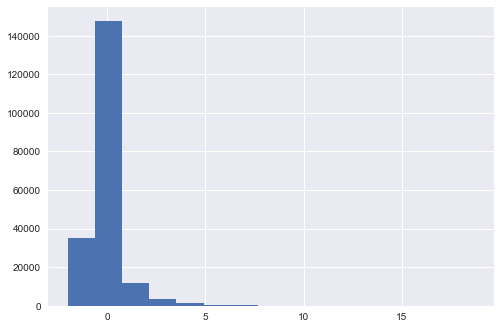

In [152]:
plt.figure(1)

plt.hist(x_tr_s[:,1], bins=15)
plt.show()